# 23rd June 2020 - Filter use

### Import libraries

In [23]:
#Load the libraries
import numpy as np #math libraty
import matplotlib.pyplot as plt #plot library

from scipy.signal import filtfilt #Apply a digital filter forward and backward to a signal
from scipy.signal import resample #undersample a trace
from scipy.signal import butter #butter filter 
from scipy.signal import convolve #Convolve two N-dimensional arrays 
from scipy.signal import freqz #Compute the frequency response of a digital filter.
from scipy.signal import freqs #Compute frequency response of analog filter

#same style parameter for plotting
plt.rc('xtick', labelsize=20) #set all figure x label size to 20
plt.rc('ytick', labelsize=20) #set all figure y label size to 20
plt.rc('font', size=20) #set font size to 20
plt.rc('figure', figsize=(10,8))

#check the parameters
#print(plt.rcParams.keys())

### Generating noisy data
The data are a sinusoidal trace with ranndom noise

In [11]:
# Filter requirements.
T = 5.0         # total sequence time, s
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,  slightly higher than actual 1.2 Hz
order = 10      # order of the filter to apply
n = int(T * fs) # total number of samples

t=np.linspace(0, 5, n)

# sin wave
sig = np.sin(1.2*2*np.pi*t)# Lets add some noise
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = sig + noise

Text(0, 0.5, 'Amplitude (a.u.)')

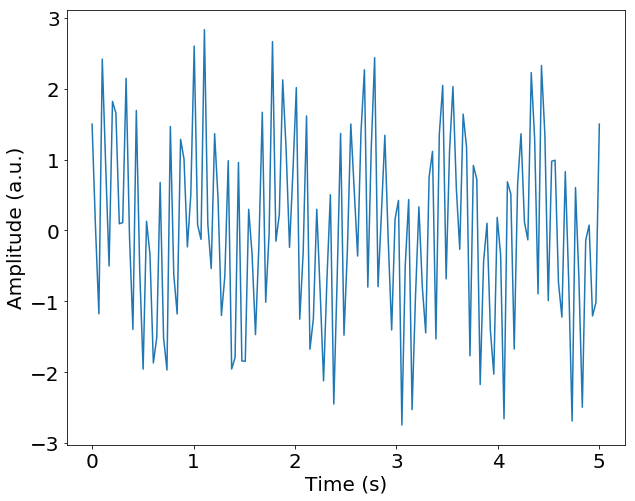

In [12]:
plt.figure()
plt.plot(t, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')

### Define Filter functions
#### Finite and Infinite Impulse Response filters
There are two large families of filters: Finite Impulse Response (FIR) have an output that becomes exactly zeros after some time (proper of analog or hardware filters), while the Infinite Impulse Response (IIR) does not (common in digital filters). In digital signal (fixed sampling rate) IIR should be used (why?). 

Digital filters are defined in terms of the coefficients of the difference equation that defines how the output signal is related to the input signal:

$$   {\displaystyle {\begin{aligned}y\left[n\right]&={\frac {1}{a_{0}}}(b_{0}x[n]+b_{1}x[n-1]+\cdots +b_{P}x[n-P]\\&-a_{1}y[n-1]-a_{2}y[n-2]-\cdots -a_{Q}y[n-Q])\end{aligned}}}
$$

Basically we have some coefficients a and b.  The **transfer function** is found from the **Z-tranform**. 

In the specific the digital **butter filter** (IIR) returns the only the coeffiencients a_i and b_i, and the function filtfilt is used to appay the filter to the data.

On the other and a **boxcar** (FIR) has a rectangular impulse response (basically is the moving average). 

For more about filters read https://en.wikipedia.org/wiki/Infinite_impulse_response , while for information about the python signal library read https://docs.scipy.org/doc/scipy/reference/signal.html

In [28]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = 2*cutoff / fs
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


def boxcar_lowpass_filter(data, width):  
    w=width
    mask=np.ones((1,w))/w
    mask=mask[0,:]
    y=np.convolve(data, mask, 'same')
    return y

### Plot the filters
We can plot the filter in frequency and time domain. In order to see the filter responce we can use the functions **freqs** for analog filters and **freqz** for digital ones. 

For digital filter the x axis has $\frac{\mbox{rad}}{\mbox{samples}}$ units. In order to convert to a real frequency value we need to use the **sampling rate** $f_s$:
$$f[\frac{\mbox{rad}}{\mbox{samples}}]=f[\frac{\mbox{cycles}}{\mbox{seconds}}]⋅\frac{2\pi}{ f_s}$$

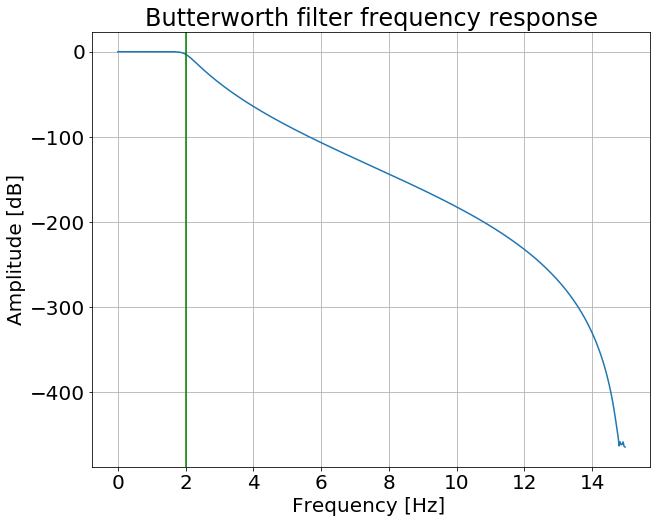

In [29]:
normal_cutoff=2*cutoff / fs
b, a = butter(order, normal_cutoff, btype='low', analog=False)
#plt.scatter(a,b)

w, h = freqz(b, a)

plt.figure()
w=w*fs/(2*np.pi)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz] ')
plt.ylabel('Amplitude [dB]')

plt.grid(which='both', axis='both')
plt.axvline(cutoff, color='green') # cutoff frequency
plt.show()

### Filter the data

C:\Users\scmarco\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


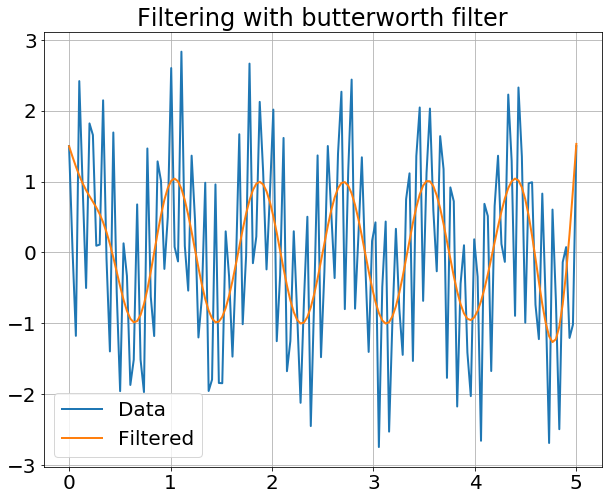

In [30]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.figure()
plt.title('Filtering with butterworth filter')
plt.plot(t, data, lw=2, label='Data')
plt.plot(t,y, lw=2, label='Filtered')
plt.grid(True)
plt.legend(fontsize=20)

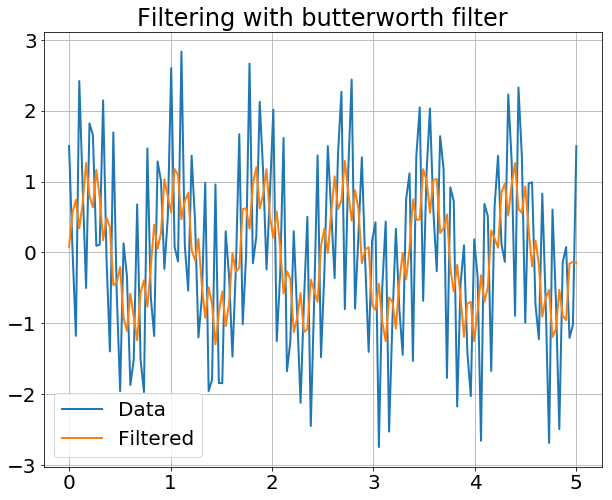

In [33]:
width=5
y=boxcar_lowpass_filter(data, width)
plt.figure()
plt.title('Filtering with butterworth filter')
plt.plot(t, data, lw=2, label='Data')
plt.plot(t,y, lw=2, label='Filtered')
plt.grid(True)
plt.legend(fontsize=20)